# OU Process

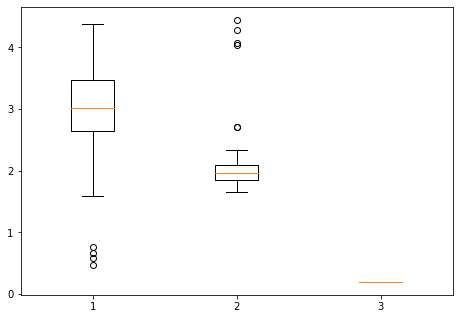

[[0.         0.9995922  0.99958388 0.2       ]
 [0.13600307 3.63170536 3.68541364 0.2       ]
 [0.25773264 3.13045674 2.41864037 0.2       ]
 [0.36423488 4.04442778 1.5040379  0.2       ]
 [0.47813572 3.64899632 1.84158671 0.2       ]
 [0.60507349 3.43481985 2.04634762 0.2       ]
 [0.6577483  3.63543503 1.82513365 0.2       ]
 [0.73941872 3.65609585 1.80813387 0.2       ]
 [0.82746814 3.59777404 1.85323408 0.2       ]
 [0.90550948 3.57681485 1.86918213 0.2       ]
 [0.9879039  3.51557501 1.91393365 0.2       ]
 [1.06837363 3.45394703 1.95826184 0.2       ]
 [1.11228602 3.51732918 1.91342116 0.2       ]
 [1.17493695 3.49262853 1.92943168 0.2       ]
 [1.23357189 3.47056519 1.94329383 0.2       ]
 [1.2912403  3.44067888 1.96150005 0.2       ]
 [1.3408106  3.42902286 1.96841795 0.2       ]
 [1.39998693 3.37590383 1.99895369 0.2       ]
 [1.41585833 3.45141064 1.95619013 0.2       ]
 [1.45927725 3.43146713 1.96686931 0.2       ]
 [1.49946825 3.41473721 1.97563582 0.2       ]
 [1.53056171 

In [61]:
from scripts import EKF # inferred module
import numpy as np
import matplotlib.pyplot as plt


theta_true = np.array([3,2,0.2])
dim_para = theta_true.shape[0]
K = 100
N_num = 50
Parameter_est= np.zeros((K,dim_para+1))
for i in range(100):
    model = EKF.SDE_OU(dt = 1/N_num)
    measurements = model.generate_synthetic_data(theta = theta_true, N = N_num)
    inferred_params = EKF.extended_kalman_filter(model, measurements)

    Parameter_est[i] = np.mean(inferred_params[len(inferred_params) // 2:], axis=0)
# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(Parameter_est[:,1:])
plt.show()
print(inferred_params)
from scipy.io import savemat

ERR_summary = {
    'inferred_params': Parameter_est,
}
filename = 'EKF_OU' + str(N_num) + '.mat'
savemat(filename,ERR_summary)



# Bessel Process

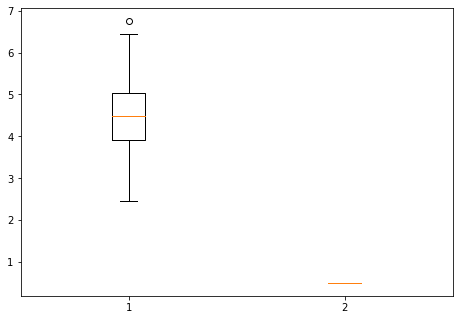

In [65]:
from scripts import EKF # inferred module
import numpy as np

theta_true = np.array([5,0.5])
dim_para = theta_true.shape[0]
K = 100
N_num = 100
Parameter_est= np.zeros((K,dim_para+1))
for i in range(100):
    model = EKF.Bessel_Process(dt = 1/N_num)
    measurements = model.generate_synthetic_data(theta = theta_true, N = N_num)
    inferred_params = EKF.extended_kalman_filter(model, measurements)

    Parameter_est[i] = np.mean(inferred_params[len(inferred_params) // 2:], axis=0)

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(Parameter_est[:,1:])
plt.show()

from scipy.io import savemat

ERR_summary = {
    'inferred_params': Parameter_est,
}
filename = 'EKF_Bessel' + str(N_num) + '.mat'
savemat(filename,ERR_summary)

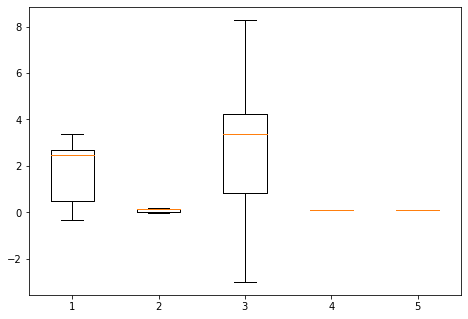

In [147]:
from scripts import EKF # inferred module
import numpy as np
import matplotlib.pyplot as plt
N_num = 100
theta_true = np.array([0.5, 0.0025, 0.3, 0.1, 0.1])
dim_para = theta_true.shape[0]
K = 100
Parameter_est= np.zeros((K,dim_para+2))
for i in range(K):
    model = EKF.LotkaVolterraModel2(dt = 10/N_num)
    measurements = model.generate_synthetic_data(theta = theta_true, N = N_num)
    inferred_params = EKF.extended_kalman_filter(model, measurements)

    Parameter_est[i] = np.mean(inferred_params[len(inferred_params) // 2:], axis=0)

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(Parameter_est[:,2:])
plt.show()
from scipy.io import savemat

from scipy.io import savemat

ERR_summary = {
    'inferred_params': Parameter_est,
}
filename = 'EKF_LV' + str(N_num) + '.mat'
savemat(filename,ERR_summary)

In [148]:
measurements

array([[  40.        ,    9.        ],
       [  41.94755161,    8.83097329],
       [  43.93496254,    8.63393978],
       [  46.05500014,    8.45858892],
       [  48.23936651,    8.27925513],
       [  50.52856009,    8.13541312],
       [  52.96902973,    7.99463948],
       [  55.51084844,    7.90809563],
       [  58.1568352 ,    7.73133568],
       [  60.9431083 ,    7.58069297],
       [  63.81630826,    7.51731855],
       [  66.93745807,    7.41554933],
       [  70.18201542,    7.29916907],
       [  73.60137133,    7.1746983 ],
       [  77.17097054,    7.03932859],
       [  80.92004071,    7.00026747],
       [  84.86203941,    6.95985537],
       [  88.9369264 ,    6.89844866],
       [  93.26391399,    6.83597099],
       [  97.75855906,    6.7927673 ],
       [ 102.46681322,    6.71563535],
       [ 107.44830609,    6.6606602 ],
       [ 112.6268347 ,    6.67529788],
       [ 118.06555088,    6.65229071],
       [ 123.71837037,    6.63107559],
       [ 129.70252614,   

# UKF
 

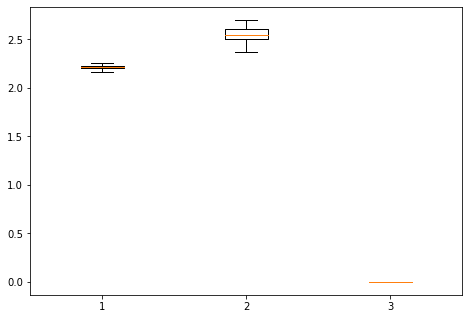

In [142]:
import numpy as np
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF
from scripts import EKF # inferred module
K = 100
N_num = 100
Parameter_est= np.zeros((K,3+1))
def ou_process(x, dt, theta, mu, sigma):
    return x + theta * (mu - x) * dt, sigma * np.sqrt(dt)

def ukf_ou(y, x0, theta0, mu0, sigma0, dt, Q, R):
    # Initial parameters
    x = np.array([x0, theta0, mu0, sigma0])
    
    # Define the state transition function
    def f(x, dt):
        x_next, sigma = ou_process(x[0], dt, x[1], x[2], x[3])
        return np.array([x_next, x[1], x[2], sigma])

    # Define the observation function
    def h(x):
        return np.array([x[0]])

    # Initialize the UKF
    points = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=-1)
    ukf = UKF(dim_x=4, dim_z=1, dt=dt, fx=f, hx=h, points=points)
    ukf.x = x
    ukf.R = R
    ukf.Q = Q

    # Iterate over the observations
    for yi in y:
        ukf.predict()
        ukf.update(np.array([yi]))

    return ukf.x
import numpy as np

for i in range(K):
    model = EKF.SDE_OU(dt = 1/N_num)
    theta_true = np.array([3,2,0.2])
    y = model.generate_synthetic_data(theta = theta_true, N = N_num)
    y = y.squeeze()
    # Let's assume you have a sequence of observations 'y' from an Ornstein-Uhlenbeck process

    # Initial guesses for the state and parameters
    x0 = 0  # initial state
    theta0 = 2  # rate of reversion to the mean
    mu0 = 2  # long-term mean of the process
    sigma0 = 0.5  # volatility
    # Time step size
    dt = 1/N_num
    # Process noise covariance matrix
    Q = np.eye(4) * 0.1
    # Measurement noise covariance matrix
    R = np.eye(1) * 0.1
    # Apply the Unscented Kalman Filter
    x_est = ukf_ou(y, x0, theta0, mu0, sigma0, dt, Q, R)
    Parameter_est[i] = x_est

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(Parameter_est[:,1:])
plt.show()
from scipy.io import savemat

from scipy.io import savemat

ERR_summary = {
    'inferred_params': Parameter_est,
}
filename = 'UKF_OU' + str(N_num) + '.mat'
savemat(filename,ERR_summary)


In [146]:
import numpy as np
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF
from scripts import EKF # inferred module
K = 100
N_num = 100
Parameter_est= np.zeros((K,3+1))
def sde_lv(x, dt, alpha, beta, gamma, sigma1, sigma2):
    dB1 = np.random.normal(0, np.sqrt(dt))
    dB2 = np.random.normal(0, np.sqrt(dt))
    dx = (alpha * x[0] - beta * x[0] * x[1]) * dt + sigma1 * x[0] * dB1
    dy = (beta * x[0] * x[1] - gamma * x[1]) * dt + sigma2 * x[1] * dB2
    return np.array([x[0] + dx, x[1] + dy])

def ukf_sde_lv(y, x00,x01, alpha0, beta0, gamma0, sigma10, sigma20, dt, Q, R):
    # Initial parameters
    x = np.array([x00, x01, alpha0, beta0, gamma0, sigma10, sigma20])
    
    # Define the state transition function
    def f(x, dt):
        x_next = sde_lv(x[:2], dt, x[2], x[3], x[4], x[5], x[6])
        return np.concatenate([x_next, x[2:]])

    # Define the observation function
    def h(x):
        return x[:2]

    # Initialize the UKF
    points = MerweScaledSigmaPoints(7, alpha=.1, beta=2., kappa=-1)
    ukf = UKF(dim_x=7, dim_z=2, dt=dt, fx=f, hx=h, points=points)
    ukf.x = x
    ukf.R = R
    ukf.Q = Q

    # Iterate over the observations
    for yi in y:
        ukf.predict()
        ukf.update(yi)

    return ukf.x



# Let's assume you have a sequence of observations 'y' from a stochastic Lotka-Volterra process
model = EKF.LotkaVolterraModel2(dt = 10/N_num)
theta_true = np.array([0.3, 0.02, 0.3, 0.1, 0.1])
y = model.generate_synthetic_data(theta = theta_true, N = N_num)
# Initial guesses for the state and parameters
x00 = 41  # initial prey population
x01 = 9 #initial predator population
alpha0 = 0.1
beta0 = 0.02
gamma0 = 0.3
delta0 = 0.01
sigma10 = 0.1
sigma20 = 0.1
y = np.random.normal(0, 1, (100, 2))
# Time step size
dt = 10/N_num

# Process noise covariance matrix
Q = np.eye(7) * 0.1

# Measurement noise covariance matrix
R = np.eye(2) * 0.1

# Apply the Unscented Kalman Filter
x_est = ukf_sde_lv(y, x00, x01, alpha0, beta0, gamma0, sigma10, sigma20, dt, Q, R)

print('Estimated parameters:')
print('State x (prey):', x_est[0])
print('State y (predator):', x_est[1])
print('Alpha:', x_est[2])
print('Beta:', x_est[3])
print('Gamma:', x_est[4])
print('Sigma1:', x_est[5])
print('Sigma2:', x_est[6])



Estimated parameters:
State x (prey): 0.3212538300257002
State y (predator): -0.14627858116797832
Alpha: -1.632274648027801
Beta: 1.2145706438016395
Gamma: 3.006583620435297
Sigma1: 2.1961817800767283
Sigma2: -1.746106841347156


In [36]:
x = np.array([x0, alpha0, beta0, gamma0, delta0, sigma10, sigma20])


/var/folders/2m/771d6j2s26v_rv60hw5x8xv00000gq/T/ipykernel_56823/2725766426.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([x0, alpha0, beta0, gamma0, delta0, sigma10, sigma20])
